# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

In [4]:
from scipy.stats import t

Загружаем данные по регионам

In [5]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Исследуем полученные дата сеты

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Исследовательский анализ данных

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Функция построения гистограммы и боксплот
def stat_plot(data, param, bins=10):
    # Create Fig
    fig = plt.figure(figsize=(15, 6), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1])
    
    # histogram on main ax
    ax_main.hist(data[param], bins, histtype='stepfilled', orientation='vertical')

    # boxplot in the right
    ax_right.boxplot(data[param])
    ax_right.grid(axis='y')

    # Decorations
    ax_main.set(title='Гистограмма и боксплот по параметру '+param)

    plt.show()

#### Регион 0

Параметр **f0**

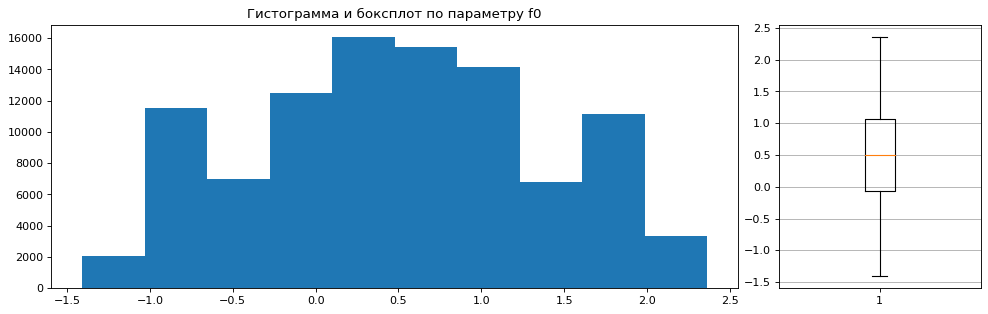

In [14]:
stat_plot(geo_data_0, 'f0')

Выбросы в параметра **f0** отсутствуют. Корректировка данных **не требуется**.

Параметр **f1**

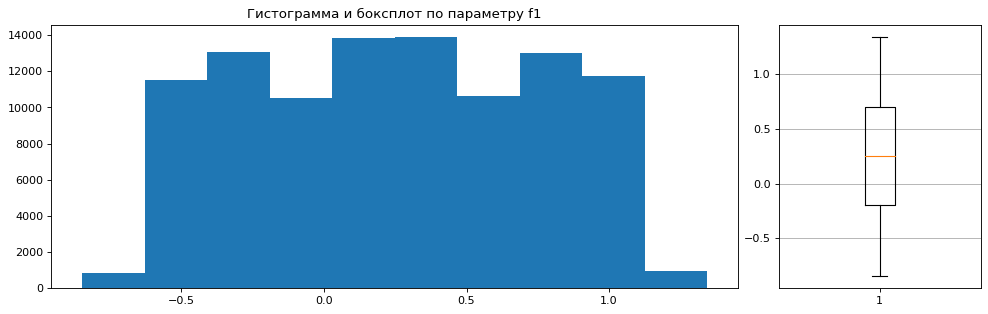

In [15]:
stat_plot(geo_data_0, 'f1')

Выбросы в параметра **f1** отсутствуют. Корректировка данных **не требуется**.

Параметр **f2**

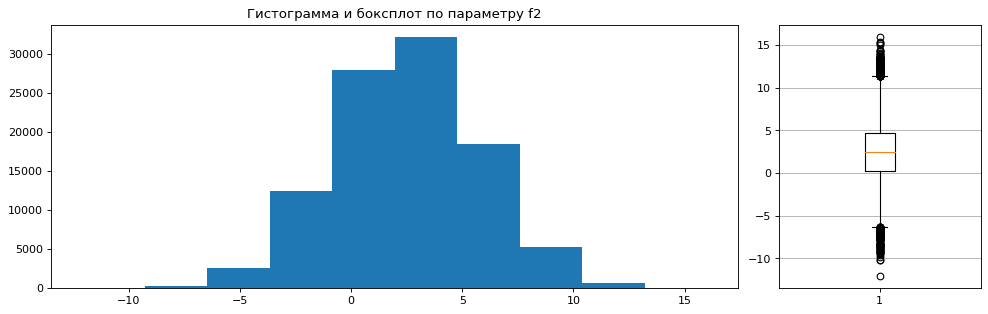

In [16]:
stat_plot(geo_data_0, 'f2')

Значительные выбросы в параметра **f2** отсутствуют. Корректировка данных **не требуется**.

Параметр **product**

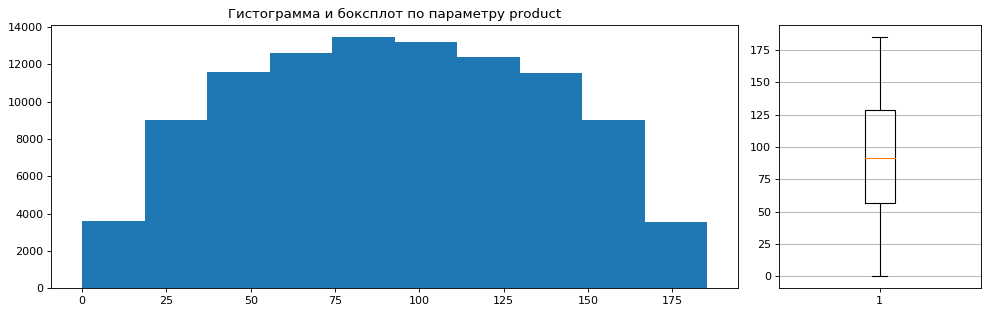

In [17]:
stat_plot(geo_data_0, 'product')

Выбросы в параметра **product** отсутствуют. Корректировка данных **не требуется**.

Проверим данные на наличие дублей

In [18]:
geo_data_0.duplicated().sum()

0

Дубликаты отсутствуют. Корректировка данных **не требуется**.

=================================================================================================

#### Регион 1

Параметр **f0**

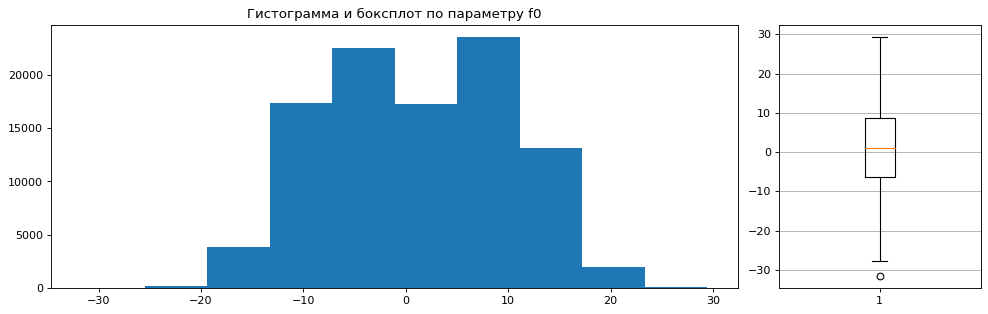

In [19]:
stat_plot(geo_data_1, 'f0')

Присутствует единичный выброс параметра **f0**. Корректировка данных **не требуется**.

Параметр **f1**

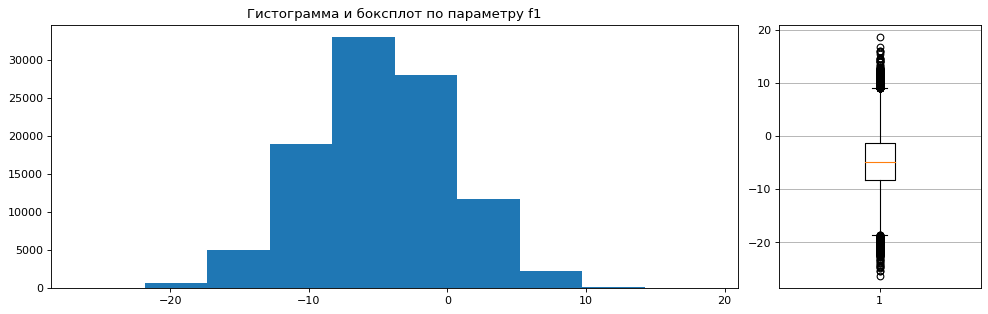

In [20]:
stat_plot(geo_data_1, 'f1')

Значительные выбросы в параметра **f1** отсутствуют. Корректировка данных **не требуется**.

Параметр **f2**

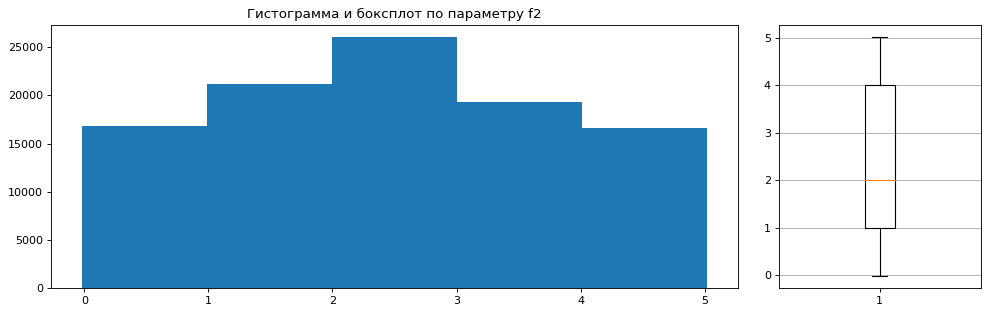

In [21]:
stat_plot(geo_data_1, 'f2', 5)

Выбросы в параметра **f2** отсутствуют. Корректировка данных **не требуется**.

Параметр **product**

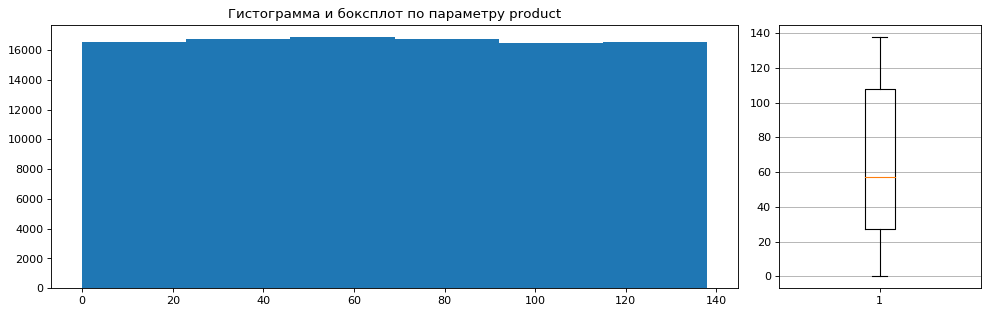

In [22]:
stat_plot(geo_data_1, 'product', 6)

Выбросы в параметра **product** отсутствуют. Корректировка данных **не требуется**.

Проверим данные на наличие дублей

In [23]:
geo_data_1.duplicated().sum()

0

Дубликаты отсутствуют. Корректировка данных **не требуется**.

======================================================================================

#### Регион 2

Параметр **f0**

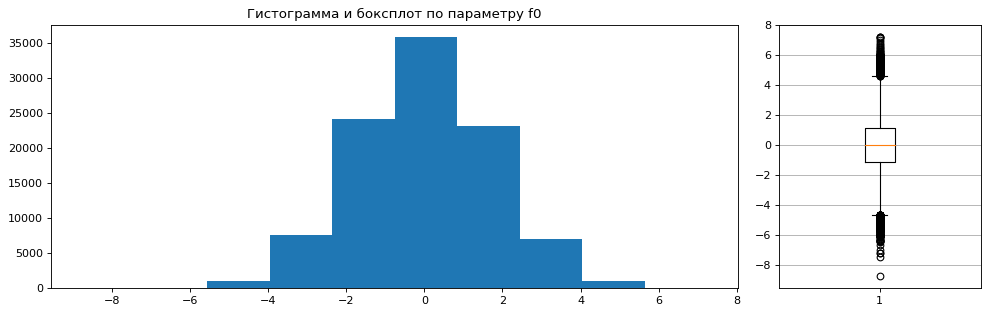

In [24]:
stat_plot(geo_data_2, 'f0')

Присутствует единичный значительный выброс параметра **f0**. Корректировка данных **не требуется**.

Параметр **f1**

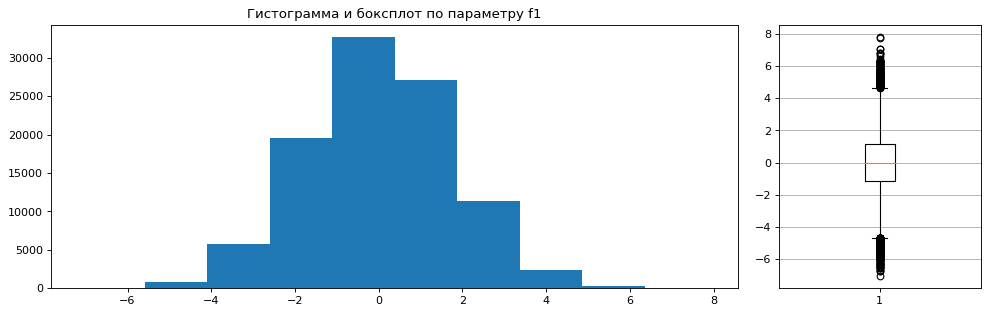

In [25]:
stat_plot(geo_data_2, 'f1')

Значительные выбросы в параметра **f1** отсутствуют. Корректировка данных **не требуется**.

Параметр **f2**

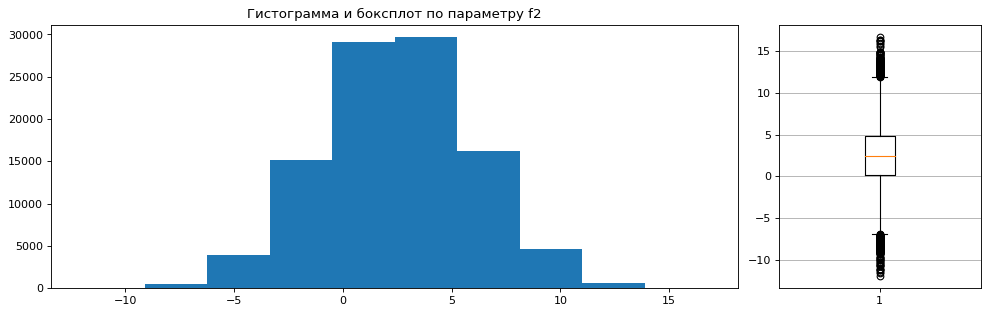

In [26]:
stat_plot(geo_data_2, 'f2')

Значительные выбросы в параметра **f2** отсутствуют. Корректировка данных **не требуется**.

Параметр **product**

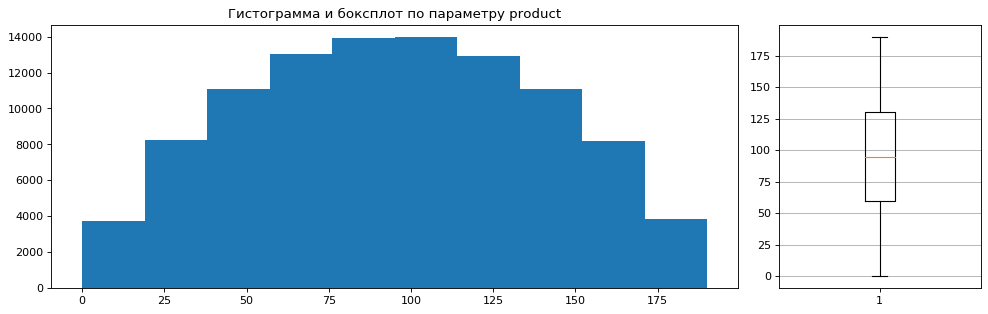

In [27]:
stat_plot(geo_data_2, 'product')

Выбросы в параметра **product** отсутствуют. Корректировка данных **не требуется**.

Проверим данные на наличие дублей

In [28]:
geo_data_2.duplicated().sum()

0

Дубликаты отсутствуют. Корректировка данных **не требуется**.

### Удалим столбцы id из датасетов

In [29]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [30]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [31]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [32]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


<font color='blue' size='4'>Датасеты проверены на корректность данных и пустые значения, удалены столбцы id. Преобразование параметров не требуется, так как категориальные признаки отсутствуют. Данные готовы для обучения моделей. 

# 2. Обучение и проверка модели

#### Выделим признаки и целевой признак

In [33]:
# Регион 0
target_0 = geo_data_0['product']
features_0 = geo_data_0.drop(['product'], axis=1)

In [34]:
# Регион 1
target_1 = geo_data_1['product']
features_1 = geo_data_1.drop(['product'], axis=1)

In [35]:
# Регион 2
target_2 = geo_data_2['product']
features_2 = geo_data_2.drop(['product'], axis=1)

#### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25

In [36]:
# Регион 0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, 
                                                                              test_size=0.25, random_state=12345)

In [37]:
# Регион 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, 
                                                                              test_size=0.25, random_state=12345)

In [38]:
# Регион 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, 
                                                                              test_size=0.25, random_state=12345)

Проверим корректность разбиения на тренировочную и валидационные выборки

In [39]:
print(features_train_0.shape, features_train_1.shape, features_train_2.shape)
print(target_train_0.shape, target_train_2.shape, target_train_2.shape)

(75000, 3) (75000, 3) (75000, 3)
(75000,) (75000,) (75000,)


#### Масштабируем признаки

In [40]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()

# Регион 0
scaler.fit(features_train_0[numeric])
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

# Регион 1
scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

# Регион 2
scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Проверим корректность масштабирования

In [41]:
features_train_0.head()

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [42]:
features_train_1.head()

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


In [43]:
features_train_2.head()

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


Признаки масштабированы.

### Обучение моделей

#### Регион 0

Проведем обучение модели, получим предсказания для валидационной выборки и оценим качество

In [44]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

predict_valid_0 = model_0.predict(features_valid_0)
rmse_0 = (mean_squared_error(target_valid_0, predict_valid_0))**0.5
print('Средний запас предсказанного сырья:', predict_valid_0.mean())
print('RMSE модели:', rmse_0)

Средний запас предсказанного сырья: 92.59256778438038
RMSE модели: 37.5794217150813


======================================================================================================================

#### Регион 1

In [45]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

predict_valid_1 = model_1.predict(features_valid_1)
rmse_1 = (mean_squared_error(target_valid_1, predict_valid_1))**0.5
print('Средний запас предсказанного сырья:', predict_valid_1.mean())
print('RMSE модели:', rmse_1)

Средний запас предсказанного сырья: 68.728546895446
RMSE модели: 0.8930992867756158


======================================================================================================================

#### Регион 2

In [46]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

predict_valid_2 = model_2.predict(features_valid_2)
rmse_2 = (mean_squared_error(target_valid_2, predict_valid_2))**0.5
print('Средний запас предсказанного сырья:', predict_valid_2.mean())
print('RMSE модели:', rmse_2)

Средний запас предсказанного сырья: 94.96504596800489
RMSE модели: 40.02970873393434


<font color='blue' size='4'>Модели предсказаний обучены для всех регионов. Лучшее качество показывает модель для первого региона, при этом для нее самый низких средний запас предсказанного сырья. Максимальный предсказанный средний запас сырья показывает модель второго региона, но у нее худшее качество из всех.

# 3. Подготовка к расчёту прибыли

Сохраним ключевые значения для расчётов в отдельных переменных.

In [47]:
budget = 10000000000 # бюджет 10 млрд рублей на регион
income_per_unit = 450000 # доход с каждой единицы продукта
n_point = 500 # количество точек для исследования в регионе
n_best_point = 200 # количество точек для расчета прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [48]:
mean_product = (budget / n_best_point) / income_per_unit
print('Средний безубыточный объем сырья:', round(mean_product, 2))

Средний безубыточный объем сырья: 111.11


<font color='blue' size='4'>В среднем каждая новая скважина должна принести не менее 111 единиц продукта для безубыточной разработки. Средние предсказанные запасы по регионам 0 и 2 близки к среднему безубыточному запасу, в регионе 1 средний предсказанных запас намного меньше среднего безубыточного. 

# 4. Расчёт прибыли и рисков 

In [49]:
state = np.random.RandomState(12345)

In [50]:
# функция расчета прибыли по n лучшим скважнам
def revenue(target, predict, count):
    predict_sorted = predict.sort_values(ascending=False)
    selected = target[predict_sorted.index][:count]
    return income_per_unit * selected.sum()

### Рассчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков

#### Регион 0

In [51]:
predict_valid_0 = pd.Series(predict_valid_0, index=target_valid_0.index)

In [52]:
values_0 = []
for i in range(1000):
    # < напишите код здесь>
    target_subsample_0 = target_valid_0.sample(n=n_point, replace=True, random_state=state)
    predict_subsample_0 = predict_valid_0[target_subsample_0.index]
    values_0.append(revenue(target_subsample_0, predict_subsample_0, n_best_point))

values_0 = pd.Series(values_0)
profit_0 = pd.Series([x - budget for x in values_0])
mean_0 = profit_0.mean()

lower = profit_0.quantile(0.025)
upper = profit_0.quantile(0.975)

print('Средняя прибыль региона, млн руб:', round(mean_0/1000000, 4))
print('95%-й доверительный интервал:', round(lower/1000000, 4),',', round(upper/1000000, 4))

Средняя прибыль региона, млн руб: 425.9385
95%-й доверительный интервал: -102.0901 , 947.9764


In [53]:
loss_0 = pd.Series([x < 0 for x in profit_0]).sum()
probability_of_loss_0 = loss_0/len(profit_0)
print('Вероятность убытков составляет: {:.2%}'.format(probability_of_loss_0))

Вероятность убытков составляет: 6.00%


======================================================================================================================

#### Регион 1

In [54]:
predict_valid_1 = pd.Series(predict_valid_1, index=target_valid_1.index)

In [55]:
values_1 = []
for i in range(1000):
    # < напишите код здесь>
    target_subsample_1 = target_valid_1.sample(n=n_point, replace=True, random_state=state)
    predict_subsample_1 = predict_valid_1[target_subsample_1.index]
    values_1.append(revenue(target_subsample_1, predict_subsample_1, n_best_point))

values_1 = pd.Series(values_1)
profit_1 = pd.Series([x - budget for x in values_1])
mean_1 = profit_1.mean()

lower = profit_1.quantile(0.025)
upper = profit_1.quantile(0.975)

print('Средняя прибыль региона, млн руб:', round(mean_1/1e6, 4))
print('95%-й доверительный интервал:', round(lower/1e6, 4), ',', round(upper/1e6, 4))

Средняя прибыль региона, млн руб: 518.2595
95%-й доверительный интервал: 128.1232 , 953.613


In [56]:
loss_1 = pd.Series([x < 0 for x in profit_1]).sum()
probability_of_loss_1 = loss_1/len(profit_1)
print('Вероятность убытков составляет: {:.2%}'.format(probability_of_loss_1))

Вероятность убытков составляет: 0.30%


======================================================================================================================

#### Регион 2

In [ ]:
predict_valid_2 = pd.Series(predict_valid_2, index=target_valid_2.index)

In [ ]:
values_2 = []
for i in range(1000):
    # < напишите код здесь>
    target_subsample_2 = target_valid_2.sample(n=n_point, replace=True, random_state=state)
    predict_subsample_2 = predict_valid_2[target_subsample_2.index]
    values_2.append(revenue(target_subsample_2, predict_subsample_2, n_best_point))

values_2 = pd.Series(values_2)
profit_2 = pd.Series([x - budget for x in values_2])
mean_2 = profit_2.mean()

lower = profit_2.quantile(0.025)
upper = profit_2.quantile(0.975)

print('Средняя прибыль региона, млн руб:', round(mean_2/1e6, 4))
print('95%-й доверительный интервал:', round(lower/1e6, 4),',', round(upper/1e6, 4))

In [ ]:
loss_2 = pd.Series([x < 0 for x in profit_2]).sum()
probability_of_loss_2 = loss_2/len(profit_2)
print('Вероятность убытков составляет: {:.2%}'.format(probability_of_loss_2))

<font color='blue' size='5'><b>Вывод</b>
    
<font color='blue' size='4'>В ходе проекта для каждого региона были подготовлены модели по предсказанию объема продукта в скважине, на основании 10000 записей о пробах скважин.
Для каждого региона были рассчитаны средняя выручка, 95%-доверительный интервал и вероятность риска убытка.<br>
<p>    
-- Регион 0 --<br>
    Средняя прибыль, млн руб. = 425.9385<br>
    95%-ый доверительный интервал: (-102.0901, 947.9764)<br>
    Риск убытков = 6%<br>
<br>    
</p>
<p>    
-- Регион 1 --<br>
    Средняя прибыль, млн руб. = 518.25955<br>
    95%-ый доверительный интервал: (128.1232, 953.613)<br>
    Риск убытков = 0.3%<br>
</p>
<p>    
-- Регион 2 --<br>
    Средняя прибыль, млн руб. = 424.2125<br>
    95%-ый доверительный интервал: (-94.9203, 932.89)<br>
    Риск убытков = 4.9%<br>
</p>
    
<b>По результатам рассчетов, к разработке рекомендуется регион 1. Средняя прогнозируемая прибыль составит 518.26 млн рублей, при этом риск убытков составляет 0.3%. Для остальных регионов риск убытков превышает 2.5%